<a href="https://colab.research.google.com/github/paysis/svm-bank/blob/main/HW6_bank_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm bank.csv
!wget https://raw.githubusercontent.com/paysis/svm-bank/refs/heads/main/bank.csv

--2024-12-16 00:40:24--  https://raw.githubusercontent.com/paysis/svm-bank/refs/heads/main/bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461474 (451K) [text/plain]
Saving to: ‘bank.csv’

bank.csv            100%[===================>] 450.66K  --.-KB/s    in 0.05s   

2024-12-16 00:40:24 (9.49 MB/s) - ‘bank.csv’ saved [461474/461474]



# HW6 SVM Bank - Gürkan Göztepeli

## Imports

Bu kod parçası, çeşitli makine öğrenmesi ve veri işleme kütüphanelerini içe aktarmaktadır. Aşağıda her bir kütüphanenin ne işlevi olduğu açıklanmıştır:

* pandas: Veri manipülasyonu ve analiz için kullanılan bir kütüphanedir. Veri çerçeveleri (DataFrame) üzerinde işlem yaparak veriyi düzenleriz.
* train_test_split ve GridSearchCV (sklearn.model_selection):
    train_test_split, veriyi eğitim ve test setlerine ayırmamıza olanak sağlar.
    GridSearchCV, hiperparametre optimizasyonu için kullanılır ve modelin parametrelerini optimize eder.
* StandardScaler ve LabelEncoder (sklearn.preprocessing):
    StandardScaler, veriyi normalize etmek için kullanılır (özellikle özelliklerin farklı ölçeklere sahip olduğu durumlarda gereklidir).
    LabelEncoder, kategorik veriyi sayısal verilere dönüştürmek için kullanılır.
* LinearSVC (sklearn.svm): Destek vektör makineleri (SVM) tabanlı lineer sınıflandırıcıyı kullanmak için tercih edilen modeldir.
* accuracy_score, precision_score, recall_score, f1_score, confusion_matrix (sklearn.metrics):
    Bu metrikler, modelin başarımını değerlendirmek için kullanılır. Her biri farklı bir ölçüm sunar: doğruluk, hassasiyet, hatırlama, F1 skoru ve karışıklık matrisi.
* matplotlib.pyplot: Veri görselleştirme için kullanılan bir kütüphanedir. Grafikleri çizmek için kullanılır.
* SMOTE (imblearn.over_sampling): Dengesiz veri setlerinde, sınıf dengesizliğini gidermek amacıyla sentetik örnekler üretir.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

Bu satır, "bank.csv" adlı CSV dosyasını pandas kütüphanesinin read_csv fonksiyonu ile okumaktadır.

* pd.read_csv("bank.csv", delimiter=';'): Bu fonksiyon, belirtilen CSV dosyasını okur ve bir pandas DataFrame'e dönüştürür.
* "bank.csv": Okunacak dosyanın adıdır. Bu dosya, finansal faaliyetleri içeren veriyi içermektedir.
* delimiter=';': CSV dosyasındaki sütunlar arasındaki ayırıcı karakteri belirtir. Burada, veriler ; (noktalı virgül) ile ayrılmıştır, bu yüzden ayırıcı olarak ; kullanılmıştır.

In [3]:
data = pd.read_csv("bank.csv", delimiter=';')

Bu satır, pandas DataFrame'inin yapısını ve içeriğini incelemek için kullanılır.

* data.info() fonksiyonunun çıktısı, veri setinin yapısı hakkında aşağıdaki bilgileri sunmaktadır:

    - Toplam Satır Sayısı: Veri setinde 4521 satır bulunmaktadır. Satırlar, her bir gözlemi temsil eder.

    - Toplam Sütun Sayısı: Veri seti 17 sütundan oluşmaktadır.

    - Sütunlar ve Veri Türleri:
        - age: Yaş (int64)
        - job: İş durumu (object - kategorik veri)
        - marital: Medeni durum (object - kategorik veri)
        - education: Eğitim durumu (object - kategorik veri)
        - default: Kredi temerrüdü durumu (object - kategorik veri)
        - balance: Hesap bakiyesi (int64)
        - housing: Konut kredisi durumu (object - kategorik veri)
        - loan: Kredi durumu (object - kategorik veri)
        - contact: İletişim türü (object - kategorik veri)
        - day: Son iletişim günü (int64)
        - month: Son iletişim ayı (object - kategorik veri)
        - duration: Son iletişimin süresi (int64)
        - campaign: Pazarlama kampanyasında yapılan iletişim sayısı (int64)
        - pdays: Son iletişimden itibaren gün sayısı (int64)
        - previous: Önceki kampanyada yapılan iletişim sayısı (int64)
        - poutcome: Önceki kampanyanın sonucu (object - kategorik veri)
        - y: Hedef değişken (object - kategorik veri, "yes" veya "no" değerlerini alır)

    - Eksik Veriler: Tüm sütunlarda eksik (null) veri bulunmamaktadır. Her sütunda 4521 değeri bulunmaktadır.

    - Bellek Kullanımı: Veri setinin bellekte kapladığı alan 600.6 KB'dır.

Bu çıktı, veri setinin boyutu, sütun veri türleri ve eksik verilerin olup olmadığı gibi temel bilgileri sağlar. Kategorik ve sayısal sütunlar hakkında da fikir edinmemizi sağlar, bu sayede veri ön işleme adımlarını planlamak kolaylaşır.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Veri Ön İşleme ve Model Seçimi Fonksiyonları

* Bu kod, veri seti üzerinde çeşitli ön işleme adımlarını ve model eğitimi süreçlerini kapsayan fonksiyonlar içeriyor:

    - fill_pdays: "pdays" sütunundaki eksik (-1) değerleri en sık karşılaşılan değer ile doldurur ve sayısal türünü düzeltir.
    - print_uniques: Kategorik sütunların benzersiz değerlerini yazdırır.
    - extract_categorical_columns: Kategorik sütunları listeler.
    - fix_unknown: 'unknown' değerlerini NaN ile değiştirir ve mod değeriyle doldurur.
    - encode_labels: Kategorik verileri sayısal etiketlerle encode eder.
    - outlier_detection: Dışarıda kalan (outlier) değerleri tespit edip sınırlar içerisine alır.
    - split_data: Veriyi eğitim ve test setlerine böler, opsiyonel olarak SMOTE kullanarak dengesiz veriyi düzeltir.
    - print_column_distribution: Bir sütunun sınıf dağılımını gösterir.
    - scale_data: Veriyi ölçeklendirir (standartlaştırır).
    - model_selection: GridSearchCV ile en iyi model parametrelerini seçer ve modelin performansını ölçer (doğruluk, hassasiyet, recall, F1 skoru, vb.).

Bu fonksiyonlar, veri temizleme, dengesiz veriyle başa çıkma, özellik mühendisliği ve model değerlendirmesi için kullanılır.

In [5]:
def fill_pdays(data):
  data["pdays"] = data["pdays"].replace(-1, pd.NA)
  data["pdays"] = data["pdays"].fillna(data["pdays"].mode()[0])
  data["pdays"] = data["pdays"].infer_objects().astype(int)
  print(data["pdays"].describe())
  return data

def print_uniques(data):
  for c in data:
    if data[c].dtype == 'object':
      print(c, data[c].unique())

def extract_categorical_columns(data):
  return [c for c in data if data[c].dtype == 'object']

def fix_unknown(data):
  categorical_columns = extract_categorical_columns(data)
  data[categorical_columns] = data[categorical_columns].replace('unknown', pd.NA)
  for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])
  return data

def encode_labels(data):
  categorical_columns = extract_categorical_columns(data)
  label_encoders = {col: LabelEncoder() for col in categorical_columns}
  for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])
  return data

def _handle_outliers(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return column.clip(lower=lower_bound, upper=upper_bound)

def outlier_detection(data):
  outlier_columns = ['balance', 'duration', 'campaign']
  data[outlier_columns] = data[outlier_columns].apply(_handle_outliers)
  return data

def split_data(data, use_smote=False):
  X = data.drop(columns=['y'])
  y = data['y']
  if use_smote:
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)
  return X, y

def split_data_with_smote(data):
  return split_data(data, use_smote=True)

def split_data_without_smote(data):
  return split_data(data, use_smote=False)

def print_column_distribution(column):
  class_counts = column.value_counts()
  return class_counts

def scale_data(train, test):
  train_columns = train.columns
  test_columns = test.columns

  scaler = StandardScaler()
  train = scaler.fit_transform(train)
  test = scaler.transform(test)

  train = pd.DataFrame(train, columns=train_columns)
  test = pd.DataFrame(test, columns=test_columns)

  return train, test


def model_selection(X_train, X_test, y_train, y_test, param_grid, cv=5, scoring='f1', svm_model=LinearSVC(random_state=42)):
  clf = GridSearchCV(svm_model, param_grid, scoring=scoring, cv=cv, n_jobs=-1, verbose=3)
  clf.fit(X_train, y_train)

  best_model = clf.best_estimator_
  print("Best Parameters:", clf.best_params_)

  y_pred = best_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)

  TN, FP, FN, TP = conf_matrix.ravel()
  specificity = TN / (TN + FP)
  false_alarm_rate = FP / (FP + TN)

  print(f"Accuracy: {accuracy:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1-Score: {f1:.2f}")
  print(f"Specificity: {specificity:.2f}")
  print(f"False Alarm Rate: {false_alarm_rate:.2f}")

* Bu kod, veri setindeki sayısal sütunlar için bazı temel istatistiksel özellikleri hesaplar ve yazdırır:

    - min(): Sütundaki en küçük değeri.
    - max(): Sütundaki en büyük değeri.
    - mean(): Sütunun ortalama (aritmetik) değerini.
    - median(): Sütunun medyan değerini.
    - mode(): Sütunun en sık görülen (mod) değerini.

* Çıktıdaki her bir satır, sayısal bir sütun için bu istatistikleri içerir:

    - age: Yaş sütununun minimum değeri 19, maksimum değeri 87, ortalaması 41.17, medyanı 39 ve mod değeri 34.
    - balance: Hesap bakiyesi sütununun minimum değeri -3313, maksimum değeri 71188, ortalaması 1422.66, medyanı 444 ve mod değeri 0.
    - day: İletişim günü sütununun minimum değeri 1, maksimum değeri 31, ortalaması 15.92, medyanı 16 ve mod değeri 20.
    - duration: İletişim süresi sütununun minimum değeri 4, maksimum değeri 3025, ortalaması 263.96, medyanı 185 ve mod değeri 123.
    - campaign: Pazarlama kampanyasında yapılan iletişim sayısı sütununun minimum değeri 1, maksimum değeri 50, ortalaması 2.79, medyanı 2 ve mod değeri 1.
    - pdays: Son iletişimden itibaren geçen gün sayısı sütununun minimum değeri -1, maksimum değeri 871, ortalaması 39.77, medyanı -1 ve mod değeri -1. (Not: -1, eksik veriyi temsil ediyor olabilir.)
    - previous: Önceki kampanyada yapılan iletişim sayısı sütununun minimum değeri 0, maksimum değeri 25, ortalaması 0.54, medyanı 0 ve mod değeri 0.

In [6]:
for c in data:
  if data[c].dtype == 'int64' or data[c].dtype == 'float64':
    print(c, data[c].min(), data[c].max(), data[c].mean(), data[c].median(), data[c].mode()[0])


age 19 87 41.17009511170095 39.0 34
balance -3313 71188 1422.6578190665782 444.0 0
day 1 31 15.915284229152842 16.0 20
duration 4 3025 263.96129174961294 185.0 123
campaign 1 50 2.793629727936297 2.0 1
pdays -1 871 39.766644547666445 -1.0 -1
previous 0 25 0.5425790754257908 0.0 0


* Bu satır, daha önce tanımlanan fill_pdays fonksiyonunu veri setine uygular ve "pdays" sütunundaki eksik (-1) değerleri doldurur.

* Fonksiyonun çalışması sonrasında "pdays" sütununun istatistiksel özellikleri şu şekilde değişmiştir:

    - count: 4521 gözlem bulunmaktadır
    - mean: Ortalama değer 189.74'tür.
    - std: Standart sapma 52.43 olup, bu da değerlerin ortalamadan ne kadar saptığını gösterir.
    - min: En küçük değer 1'dir, bu da verinin düzgün şekilde doldurulduğunu gösterir (eksi değerler kaldırıldı).
    - 25% (1. çeyrek): Verinin %25'inin 182 değerinden daha küçük olduğu anlamına gelir.
    - 50% (medyan): Verinin ortalaması 182'dir, yani verilerin yarısı bu değerden küçük.
    - 75% (3. çeyrek): Verinin %75'inin 182 değerinden daha küçük olduğu gösterir.
    - max: En büyük değer 871'dir.

In [7]:
data = fill_pdays(data)

count    4521.000000
mean      189.736784
std        52.426752
min         1.000000
25%       182.000000
50%       182.000000
75%       182.000000
max       871.000000
Name: pdays, dtype: float64


<ipython-input-5-8816a5e49840>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["pdays"] = data["pdays"].fillna(data["pdays"].mode()[0])


In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,182,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,182,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,182,0,unknown,no


* print_uniques fonksiyonu, veri setindeki kategorik sütunlar için benzersiz (unique) değerleri yazdırır. Çıktı şu şekilde:

    * job: İş durumu sütunu, aşağıdaki benzersiz değerleri içerir:
        - ['unemployed', 'services', 'management', 'blue-collar', 'self-employed', 'technician', 'entrepreneur', 'admin.', 'student', 'housemaid', 'retired', 'unknown']

    * marital: Medeni durum sütunu, aşağıdaki benzersiz değerleri içerir:
        - ['married', 'single', 'divorced']

    * education: Eğitim durumu sütunu, aşağıdaki benzersiz değerleri içerir:
        - ['primary', 'secondary', 'tertiary', 'unknown']

    * default: Kredi temerrüdü durumu sütunu, aşağıdaki benzersiz değerleri içerir:
        - ['no', 'yes']

    * housing: Konut kredisi durumu sütunu, aşağıdaki benzersiz değerleri içerir:
        - ['no', 'yes']

    * loan: Kredi durumu sütunu, aşağıdaki benzersiz değerleri içerir:
        - ['no', 'yes']

    * contact: İletişim türü sütunu, aşağıdaki benzersiz değerleri içerir:
        - ['cellular', 'unknown', 'telephone']

    * month: İletişim yapılan ay sütunu, aşağıdaki benzersiz değerleri içerir:
        - ['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov', 'sep', 'mar', 'dec']

    * poutcome: Önceki kampanyanın sonucu sütunu, aşağıdaki benzersiz değerleri içerir:
        - ['unknown', 'failure', 'other', 'success']

    * y: Hedef değişken sütunu, aşağıdaki benzersiz değerleri içerir:
        - ['no', 'yes']

Bu fonksiyon, her kategorik sütunun içerdiği farklı değerleri görselleştirir ve veri setindeki kategorik verinin çeşitliliğini anlamaya yardımcı olur.

In [9]:
print_uniques(data)

job ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital ['married' 'single' 'divorced']
education ['primary' 'secondary' 'tertiary' 'unknown']
default ['no' 'yes']
housing ['no' 'yes']
loan ['no' 'yes']
contact ['cellular' 'unknown' 'telephone']
month ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']


* Bu satır, fix_unknown fonksiyonunu veri setine uygular ve kategorik sütunlardaki 'unknown' değerlerini NaN ile değiştirir. Ardından, her kategorik sütunda eksik verileri mod (en sık görülen değer) ile doldurur.

* Fonksiyonun işleyişi şu şekilde gerçekleşir:

    - 'unknown' değerleri, her kategorik sütundaki eksik (NaN) değerlere dönüştürülür.
    - Eksik (NaN) veriler, her sütun için mod değeriyle (en sık görülen değer) doldurulur.

Bu işlem, eksik verileri yönetmeye ve veriyi daha tutarlı hale getirmeye yardımcı olur.

In [10]:
data = fix_unknown(data)

* Bu satır, encode_labels fonksiyonunu veri setine uygular ve kategorik sütunlardaki verileri etiket (label) kodlaması ile sayısal verilere dönüştürür.

* Fonksiyonun işleyişi şu şekildedir:

    - Kategorik sütunlar tespit edilir.
    - Her kategorik sütun için LabelEncoder kullanılarak benzersiz kategorik değerler sayısal değerlere dönüştürülür.
        - Örneğin, bir sütundaki ['no', 'yes'] değerleri sırasıyla [0, 1] olarak değiştirilir.

Bu işlem, makine öğrenmesi algoritmalarının sadece sayısal verilerle çalışabilmesi nedeniyle gereklidir. Kategorik verileri sayısal hale getirerek modelin daha kolay işlem yapmasını sağlar.

In [11]:
data = encode_labels(data)

In [12]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,182,0,0,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,0,3,6,199,4,182,0,0,0
4,59,1,1,1,0,0,1,0,0,5,8,226,1,182,0,0,0


<Axes: >

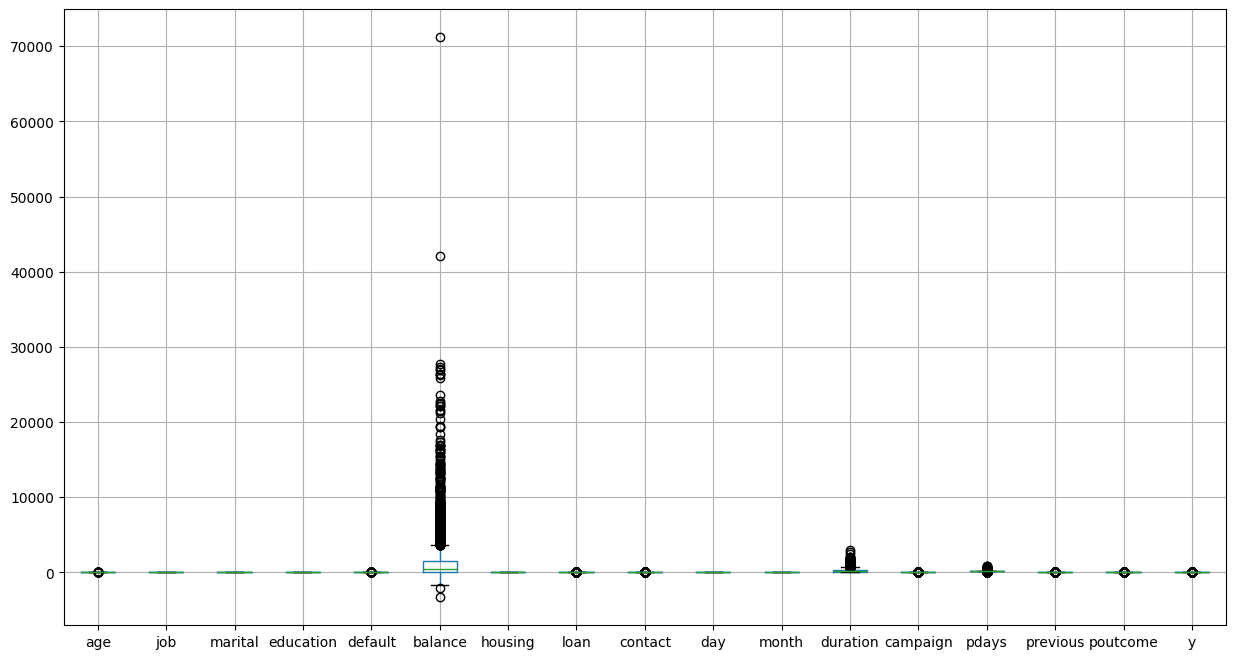

In [13]:
data.boxplot(figsize=(15, 8))

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'marital'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'housing'}>,
        <Axes: title={'center': 'loan'}>],
       [<Axes: title={'center': 'contact'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'poutcome'}>],
       [<Axes: title={'center': 'y'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

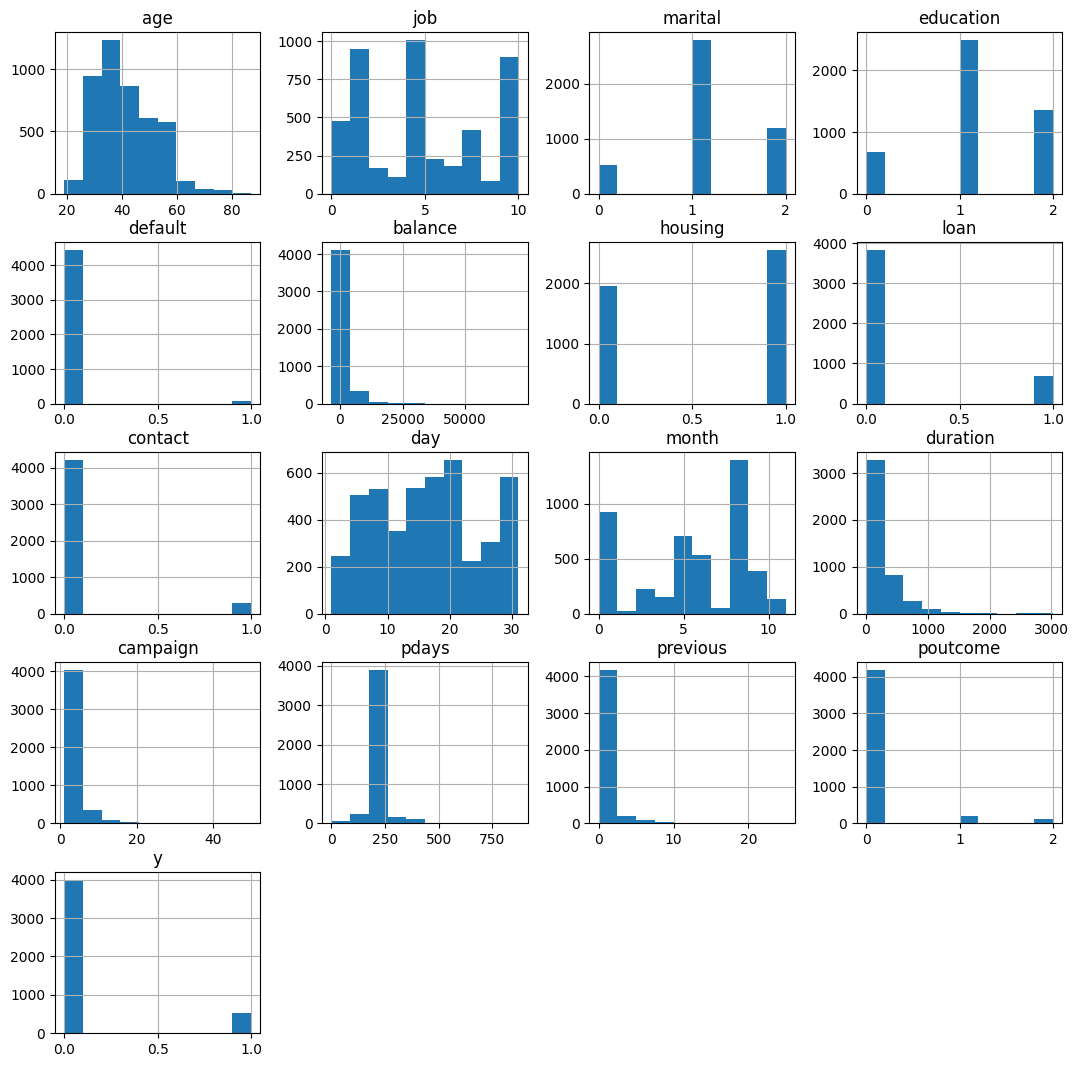

In [14]:
data.hist(figsize=(13, 13))

Bu satır, outlier_detection fonksiyonunu veri setine uygular ve balance, duration, ve campaign sütunlarındaki uç değerleri (outliers) tespit edip düzenler.

* Fonksiyonun işleyişi şu şekilde gerçekleşir:

    - Uç değerlerin tespiti:
        - Bu sütunlarda, her bir sütunun 1. çeyrek (Q1) ve 3. çeyrek (Q3) değerleri arasındaki Interquartile Range (IQR) hesaplanır.
        - Alt ve üst sınırlar belirlenir:
            - Alt sınır: Q1 - 1.5 * IQR
            - Üst sınır: Q3 + 1.5 * IQR
    - Uç değerlerin düzenlenmesi:
        - Her sütundaki veriler, belirlenen alt ve üst sınırlarla sıkıştırılır. Yani, alt sınırdan küçük olan değerler alt sınır değeriyle, üst sınırdan büyük olan değerler üst sınır değeriyle değiştirilir.

Bu işlem, verinin aşırı uçlardan arındırılmasını sağlayarak, modelin eğitiminde bu uç değerlerin olumsuz etkisini azaltır.

In [15]:
data = outlier_detection(data)

Bu satırda, split_data_without_smote fonksiyonu kullanılarak veri seti, SMOTE (Synthetic Minority Over-sampling Technique) uygulanmadan ikiye ayrılır: X (özellikler) ve y (hedef değişken).

* Fonksiyonun işleyişi şu şekilde gerçekleşir:

    - X: Bağımsız değişkenler (özellikler), yani modelin tahmin yapmak için kullanacağı veriler.
    - y: Bağımlı değişken (hedef), yani modelin tahmin etmeye çalışacağı çıktı.

Bu işlem, SMOTE uygulanmadan önce veri setinin temel özelliklerini ve dengesini görmeyi amaçlar. Bu adım, modelin daha önceki dengesizliklerini nasıl ele aldığını incelemek ve SMOTE'un uygulandığında sonuçların nasıl değişeceğini anlamak için yapılır.

Öncelikle, modelin doğal dengesizliği ile nasıl performans gösterdiğini görmek, ardından SMOTE uygulandığında modelin performansındaki farkları analiz etmek, daha sağlıklı kararlar almaya yardımcı olacaktır.

Ayrıca GridSearch kullanılması sebebiyle LinearSVM'in sınıflara ağırlık uygulayarak dengeleme uygulama yönteminin de performansa etkisini görebileceğiz.

In [16]:
X, y = split_data_without_smote(data)

In [17]:
print("SMOTE uygulanmamış hedef sütun sınıf dağılımı:")
print_column_distribution(y)

SMOTE uygulanmamış hedef sütun sınıf dağılımı:


,count
y,
0,4000
1,521


In [18]:
# ilk 3600 eğitim setinde, geri kalanı test setinde olacak
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3600, random_state=42)

In [19]:
# StandardScaler ile veri seti ölçeklendirilir
X_train, X_test = scale_data(X_train, X_test)

In [20]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.258463,1.755729,-0.245563,1.307860,-0.124558,-0.644703,-1.127516,-0.426016,-0.267857,-0.967214,-1.502336,-0.628651,-0.258911,-0.140361,-0.313921,-0.2644
1,-0.678847,1.128652,-0.245563,-0.224788,-0.124558,0.329651,-1.127516,-0.426016,-0.267857,1.702637,-1.834976,-0.655582,-0.871718,-0.140361,-0.313921,-0.2644
2,1.664430,-0.125502,-1.913535,1.307860,-0.124558,-0.788157,0.886905,-0.426016,-0.267857,1.823994,-0.171772,-1.027227,2.192318,-0.140361,-0.313921,-0.2644
3,-0.303923,-1.379657,-0.245563,1.307860,-0.124558,-0.248998,0.886905,2.347327,-0.267857,1.823994,-0.171772,-0.612493,-0.258911,-0.140361,-0.313921,-0.2644
4,0.539657,0.815113,-0.245563,-0.224788,-0.124558,1.304811,0.886905,-0.426016,-0.267857,0.003641,0.826151,0.432424,-0.871718,-0.140361,-0.313921,-0.2644


In [21]:
X_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03
mean,3.207311e-17,-1.026340e-16,1.065814e-16,-8.326673e-17,-3.552714e-17,-8.881784e-18,4.934325e-17,-1.973730e-18,-5.131698e-17,-7.500173e-17,9.868649e-18,2.171103e-17,9.868649e-18,1.174369e-16,1.430954e-17,-6.266592e-17
std,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00
min,-2.084814e+00,-1.379657e+00,-1.913535e+00,-1.757437e+00,-1.245585e-01,-2.195288e+00,-1.127516e+00,-4.260164e-01,-2.678573e-01,-1.816713e+00,-1.834976e+00,-1.280377e+00,-8.717185e-01,-3.739567e+00,-3.139212e-01,-2.644004e-01
25%,-7.725785e-01,-1.066118e+00,-2.455626e-01,-2.247884e-01,-1.245585e-01,-7.341601e-01,-1.127516e+00,-4.260164e-01,-2.678573e-01,-8.458575e-01,-8.370538e-01,-7.471467e-01,-8.717185e-01,-1.403613e-01,-3.139212e-01,-2.644004e-01
50%,-2.101920e-01,-1.255025e-01,-2.455626e-01,-2.247884e-01,-1.245585e-01,-4.226730e-01,8.869050e-01,-4.260164e-01,-2.678573e-01,3.640707e-03,1.608688e-01,-3.108671e-01,-2.589111e-01,-1.403613e-01,-3.139212e-01,-2.644004e-01
75%,7.271189e-01,8.151130e-01,1.422410e+00,1.307860e+00,-1.245585e-01,4.237418e-01,8.869050e-01,-4.260164e-01,-2.678573e-01,6.104252e-01,8.261506e-01,4.755133e-01,3.538963e-01,-1.403613e-01,-3.139212e-01,-2.644004e-01
max,4.288900e+00,1.755729e+00,1.422410e+00,1.307860e+00,8.028359e+00,2.110326e+00,8.869050e-01,2.347327e+00,3.733331e+00,1.823994e+00,1.824073e+00,2.282572e+00,2.192318e+00,1.356048e+01,1.413769e+01,4.880689e+00


In [22]:
X_test.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,-0.033314,-0.073757,0.004362,0.014844,0.061339,-0.017677,0.062326,-0.010467,-0.007194,-0.032595,0.038792,-0.024593,-0.028692,0.066198,-0.001352,-0.026978
std,0.956134,1.012341,1.000968,1.004879,1.217644,0.998031,0.991053,0.990377,0.987967,1.004047,0.993693,0.992767,0.969779,1.192942,0.892023,0.941229
min,-1.991083,-1.379657,-1.913535,-1.757437,-0.124558,-2.438273,-1.127516,-0.426016,-0.267857,-1.816713,-1.834976,-1.285763,-0.871718,-3.739567,-0.313921,-0.264400
25%,-0.772579,-1.066118,-0.245563,-0.224788,-0.124558,-0.730936,-1.127516,-0.426016,-0.267857,-0.967214,-0.504413,-0.747147,-0.871718,-0.140361,-0.313921,-0.264400
50%,-0.210192,-0.125502,-0.245563,-0.224788,-0.124558,-0.453701,0.886905,-0.426016,-0.267857,0.003641,0.160869,-0.316253,-0.258911,-0.140361,-0.313921,-0.264400
75%,0.727119,0.815113,1.422410,1.307860,-0.124558,0.356246,0.886905,-0.426016,-0.267857,0.610425,0.826151,0.405493,0.353896,-0.140361,-0.313921,-0.264400
max,3.445321,1.755729,1.422410,1.307860,8.028359,2.110326,0.886905,2.347327,3.733331,1.823994,1.824073,2.282572,2.192318,12.307719,9.513176,4.880689


* Bu satırda, param_grid adlı bir sözlük oluşturulmuştur. Bu sözlük, modelin hiperparametrelerini ayarlamak için kullanılacak bir parametre arama (grid search) alanı tanımlar. Aşağıdaki parametreler, LinearSVC modelinin optimizasyonu için potansiyel değerleri içerir:

    - penalty: Düzenlileştirme terimi. Modelin l2 düzenlileştirmesini kullanacağını belirtir. Bu, modelin karmaşıklığını kontrol etmek ve aşırı öğrenmeyi (overfitting) önlemek için kullanılır.

    - loss: Kayıp fonksiyonu. Burada squared_hinge, destek vektör makinelerinin kullandığı standart kayıp fonksiyonudur.

    - dual: Çift veya primal formülasyon. Bu parametre, doğrusal SVM'nin primal (temel) veya dual formülasyonunun kullanılacağını belirler.

    - tol: Durdurma kriteri için tolerans değeri. Modelin eğitim sürecinde durma koşuluna ne kadar yaklaşılması gerektiğini belirler.

    - C: Düzenlileştirme gücü. Yüksek bir C değeri, modelin daha sıkı bir şekilde eğitim almasını sağlar; düşük bir C değeri, modelin daha esnek olmasına yol açar.

    - fit_intercept: Kesme terimi (intercept). True olarak ayarlanırsa, modelin doğrusal denkleminde bir kesme terimi eklenir.

    - intercept_scaling: Kesme terimi ölçekleme faktörü. Kesme teriminin modeldeki etkisini belirler.

    - class_weight: Sınıf ağırlıkları. None veya 'balanced' olabilir. 'balanced' değeri, sınıf dengesizliklerini ele almak için sınıflara ağırlık verir.

    - max_iter: Maksimum iterasyon sayısı. Modelin eğitim sürecindeki maksimum tekrarlama sayısını belirler.

Bu parametreler, GridSearchCV kullanılarak modelin en iyi hiperparametre kombinasyonunu bulmak amacıyla denenir.

In [23]:
param_grid = {
    'penalty': ['l2'],  # Regularization term
    'loss': ['squared_hinge'],  # Loss function
    'dual': [True, False],  # Dual or primal formulation
    'tol': [1e-4],  # Tolerance for stopping criteria
    'C': [1.0, 10.0],  # Regularization strength
    'fit_intercept': [True, False],  # Whether to include an intercept term
    'intercept_scaling': [1.0, 10.0],  # Intercept scaling factor
    'class_weight': [None, 'balanced'],  # Class weight (None or 'balanced')
    'max_iter': [1000]  # Maximum number of iterations
}

Bu sonuçlar, modelin Accuracy'sinin %84 ile oldukça yüksek olmasına rağmen, diğer metriklerde (özellikle Precision ve F1-Score) düşük performans gösterdiğini ortaya koyuyor. Precision'ın düşük olması, modelin yanlış pozitif sınıflandırmalarının fazla olduğunu, Recall'ın ise yüksek olması, modelin pozitif sınıfları yakalamada başarılı olduğunu ancak doğruluk oranının zayıf olduğunu gösteriyor. Bu durum, modelin dengesiz sınıflarla başa çıkmada zorluk yaşadığını gösteriyor

In [24]:
model_selection(X_train, X_test, y_train, y_test, param_grid)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'C': 1.0, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 10.0, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.0001}
Accuracy: 0.84
Precision: 0.37
Recall: 0.70
F1-Score: 0.49
Specificity: 0.86
False Alarm Rate: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
X, y = split_data_with_smote(data)
print("SMOTE uygulanmış hedef sütun sınıf dağılımı:")
print_column_distribution(y)

SMOTE uygulanmış hedef sütun sınıf dağılımı:


,count
y,
0,4000
1,4000


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3600, random_state=42)

In [27]:
X_train, X_test = scale_data(X_train, X_test)

In [28]:
X_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03,3.600000e+03
mean,1.751685e-16,-1.095420e-16,1.361874e-16,4.144833e-17,3.355341e-17,4.144833e-17,-8.684411e-17,2.664535e-17,1.480297e-18,-4.440892e-17,1.203975e-16,-4.440892e-17,1.500035e-16,8.684411e-17,5.329071e-17,3.750087e-17
std,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00
min,-2.088677e+00,-1.481501e+00,-1.710161e+00,-1.697189e+00,-9.011645e-02,-2.450022e+00,-8.250286e-01,-3.197902e-01,-1.950956e-01,-1.892920e+00,-1.780689e+00,-1.502260e+00,-7.942148e-01,-3.476513e+00,-3.979526e-01,-3.269310e-01
25%,-7.984380e-01,-1.133549e+00,-4.441977e-02,-1.060743e-01,-9.011645e-02,-7.634810e-01,-8.250286e-01,-3.197902e-01,-1.950956e-01,-8.470274e-01,-7.584470e-01,-8.476498e-01,-7.942148e-01,-7.874127e-02,-3.979526e-01,-3.269310e-01
50%,-1.533183e-01,-8.969420e-02,-4.441977e-02,-1.060743e-01,-9.011645e-02,-4.065590e-01,-8.250286e-01,-3.197902e-01,-1.950956e-01,-6.260827e-02,-7.695213e-02,-3.046072e-01,-1.030924e-01,-7.874127e-02,-3.979526e-01,-3.269310e-01
75%,6.761213e-01,9.541607e-01,-4.441977e-02,-1.060743e-01,-9.011645e-02,5.602619e-01,1.212079e+00,-3.197902e-01,-1.950956e-01,7.218108e-01,9.452902e-01,8.887237e-01,5.880299e-01,-7.874127e-02,-3.979526e-01,-3.269310e-01
max,4.178200e+00,1.998016e+00,1.621322e+00,1.485040e+00,1.109675e+01,1.974258e+00,1.212079e+00,3.127050e+00,5.125693e+00,2.029176e+00,1.967532e+00,1.568836e+00,2.661397e+00,1.085076e+01,1.203267e+01,4.252647e+00


In [29]:
X_test.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,-0.042140,-0.014489,0.016531,-0.008076,0.029380,-0.003099,0.006945,-0.021325,0.034666,0.033275,-0.016624,-0.002453,0.015498,0.018863,0.005901,0.024343
std,0.974514,1.015637,1.009951,0.982204,1.150134,0.999638,1.001433,0.969481,1.081659,1.006466,0.996645,0.994941,1.016359,1.061830,1.050526,1.016811
min,-2.088677,-1.481501,-1.710161,-1.697189,-0.090116,-2.450022,-0.825029,-0.319790,-0.195096,-1.892920,-1.780689,-1.506902,-0.794215,-3.495390,-0.397953,-0.326931
25%,-0.798438,-1.133549,-0.044420,-0.106074,-0.090116,-0.769948,-0.825029,-0.319790,-0.195096,-0.847027,-0.758447,-0.843007,-0.794215,-0.078741,-0.397953,-0.326931
50%,-0.245478,-0.089694,-0.044420,-0.106074,-0.090116,-0.425944,-0.825029,-0.319790,-0.195096,0.068128,-0.076952,-0.284050,-0.103092,-0.078741,-0.397953,-0.326931
75%,0.583961,0.954161,-0.044420,-0.106074,-0.090116,0.542873,1.212079,-0.319790,-0.195096,0.721811,0.945290,0.893334,0.588030,-0.078741,-0.397953,-0.326931
max,3.901720,1.998016,1.621322,1.485040,11.096753,1.974258,1.212079,3.127050,5.125693,2.029176,1.967532,1.568836,2.661397,12.927175,15.140325,4.252647


Bu sonuçlar veri setine SMOTE uygulandıktan sonra modelin Accuracy, Precision, Recall ve F1-Score metriklerinde iyileşme gösterdiğini belirtmektedir. Özellikle, Precision ve Recall'ın yüksek olması, modelin hem doğru pozitifleri bulmada hem de yanlış pozitifleri minimize etmede etkili olduğunu gösteriyor. Specificity de %82 ile oldukça iyi bir değere ulaşmış. Ancak, False Alarm Rate'in %18 olması, modelin hala bazı yanlış pozitifler ürettiğini gösteriyor. Genel olarak, modelin performansı önemli ölçüde arttı.

In [30]:
model_selection(X_train, X_test, y_train, y_test, param_grid)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': False, 'intercept_scaling': 1.0, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.0001}
Accuracy: 0.84
Precision: 0.82
Recall: 0.86
F1-Score: 0.84
Specificity: 0.82
False Alarm Rate: 0.18


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
